In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas
from io import StringIO
import networkx as nx
import sympy
import scipy
from sklearn.preprocessing import normalize
from pathlib import Path

In [2]:
TP = "../src/main"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}

# def absolute_error(test_result: str, expected_result: str):
#     test_table = read_result(test_result)
#     expected_table = read_result(expected_result)
#     return abs(test_table - expected_table)

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

# 1. TESTS METODO

In [3]:
# TEST 1: MATRIZ DE HOUSEHOLDER Y MATRIZ DIAGONAL
n = 10
D = np.diag(range(n, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B
print(M)
# GUARDO TXT
#np.savetxt("../tests/householder.txt", M, delimiter=' ')

# CORRO METODO
run_test("householder.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/householder.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/householder.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(10))

print(M @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(M)):
    print(i)
    print(np.allclose(M @ v[:, i], l[i] * v[:,i], 1e-6))

[[ 8.20000000e+00 -1.60000000e+00 -1.40000000e+00 -1.20000000e+00
  -1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01  1.79856130e-16]
 [-1.60000000e+00  7.60000000e+00 -1.20000000e+00 -1.00000000e+00
  -8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
   1.63202785e-16  2.00000000e-01]
 [-1.40000000e+00 -1.20000000e+00  7.00000000e+00 -8.00000000e-01
  -6.00000000e-01 -4.00000000e-01 -2.00000000e-01 -9.35362898e-17
   2.00000000e-01  4.00000000e-01]
 [-1.20000000e+00 -1.00000000e+00 -8.00000000e-01  6.40000000e+00
  -4.00000000e-01 -2.00000000e-01 -6.57807142e-17  2.00000000e-01
   4.00000000e-01  6.00000000e-01]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
   5.80000000e+00 -6.57807142e-17  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01]
 [-8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
  -6.57807142e-17  5.20000000e+00  4.00000000e-01  6.00000000e-01
   8.00000000e-01  1.00000000e+00

In [238]:
# CASO SIMETRICO
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])

# GUARDO TXT
np.savetxt("../tests/simetrico.txt", A, delimiter=' ')

# CORRO METODO
run_test("simetrico.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/simetrico.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/simetrico.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(l)
print(v)


print(A @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(A)):
    print(i)
    print(np.allclose(A @ v[:, i], l[i] * v[:,i], 1e-6))

Corriendo el programa...
[ 8.83835   -3.2849522  1.446602 ]
[[-0.88455707 -0.22057717 -0.41097993]
 [-0.34915668 -0.27109465  0.89699346]
 [ 0.30927074 -0.9369383  -0.16278271]]
[-7.81802505 -3.08596897  2.73344308]
[-7.818025 -3.085969  2.733443]
0
True
1
True
2
True


In [5]:
# CASO (A) * (A traspuesta)
AT = A @ A.T
TA = A.T @ A

# GUARDO TXT
np.savetxt("../tests/AT.txt", AT, delimiter=' ')
np.savetxt("../tests/TA.txt", TA, delimiter=' ')

# CORRO METODO
run_test("AT.txt", 100000, 1e-20)
run_test("TA.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l_AT = np.loadtxt("../tests/AT.txt_autovalores.out", dtype='f', delimiter=' ')
v_AT = np.loadtxt("../tests/AT.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

l_TA = np.loadtxt("../tests/TA.txt_autovalores.out", dtype='f', delimiter=' ')
v_TA = np.loadtxt("../tests/TA.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(l_AT)
print(l_TA)
print("Bingo :)" if np.allclose(l_AT,l_TA) else "Bongo :(")
print("Bingo :)" if np.allclose(v_AT,v_TA) else "Bongo :(")

/bin/sh: ../src/tp: No such file or directory
/bin/sh: ../src/tp: No such file or directory
[78.11643   10.79091    2.0926573]
[78.11643   10.79091    2.0926573]
Bingo :)
Bingo :)


## 2. KARATE CLUB

In [11]:
# CORRER TESTS PARA GENERAR ARCHIVOS DE AUTOVALORES Y AUTOVECTORES

#run_test("karateclub_matriz.txt", 10000, 0.000001)
#run_test("prueba.txt", 10000, 0.000001)
#run_test("laplaciana_karate.txt", 1000000, 1e-20)

In [429]:
aval_l[32]

0.46852523

In [414]:
eigenvalues_karate = read_result_autovalores("karateclub_matriz.txt")
eigenvectors_karate = read_result_autovectores("karateclub_matriz.txt")
eigenvalues_prueba = read_result_autovalores("prueba.txt")
eigenvectors_prueba = read_result_autovectores("prueba.txt")

# AUTOVAL Y AUTOVEC DE A (NUESTRA FUNCION)
aval_a = np.loadtxt("../tests/karateclub_matriz.txt_autovalores.out", dtype='f', delimiter=' ')
avec_a = np.loadtxt("../tests/karateclub_matriz.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# AUTOVAL Y AUTOVEC DE LAPLACIANA (NUESTRA FUNCION)
aval_l = np.loadtxt("../tests/laplaciana_karate.txt_autovalores.out", dtype='f', delimiter=' ')
avec_l = np.loadtxt("../tests/laplaciana_karate.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# VECTOR DE GRUPOS
grupos_vec = np.loadtxt("../tests/karateclub_labels.txt", dtype='f', delimiter=' ')

# MATRIZ DE ADYACENCIA
A = np.loadtxt(TEST_DIR + "karateclub_matriz.txt", dtype='i', delimiter=' ')

In [430]:
# EIGEN DE A (NUMPY)
np_aval_a, np_avec_a = np.linalg.eig(A)
A_nx = nx.from_numpy_array(A)

# LAPLACIANA
L_scipy = nx.laplacian_matrix(A_nx)
L = scipy.sparse.csr_matrix.toarray(L_scipy)

# EIGEN DE L (NUMPY)
np_aval_l, np_avec_l = np.linalg.eig(L)

# CONECTIVIDAD ALGEBRAICA
conectividad = avec_l[32]
conectividad > 0

array([False, False,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False])

[0.35548349 0.26595387 0.31718939 0.21117408 0.07596646 0.07948058
 0.07948058 0.17095511 0.22740509 0.10267519 0.07596646 0.05285417
 0.08425192 0.2264697  0.10140628 0.10140628 0.02363479 0.09239676
 0.10140628 0.14791134 0.10140628 0.09239676 0.10140628 0.15012329
 0.05705374 0.0592082  0.07558192 0.13347933 0.13107926 0.13496529
 0.17476028 0.19103627 0.30865105 0.37337121]
[-0.36129922 -0.26962665 -0.31880003 -0.21410432 -0.07737478 -0.0810089
 -0.08100892 -0.17305581 -0.22589397 -0.10164014 -0.07737479 -0.05350488
 -0.08552238 -0.22723839 -0.09904562 -0.09904562 -0.02442536 -0.09358074
 -0.09904562 -0.14776331 -0.09904562 -0.09358074 -0.09904562 -0.14695954
 -0.05662283 -0.05860468 -0.07386144 -0.13185705 -0.13002792 -0.13200234
 -0.17298424 -0.18876804 -0.30585188 -0.3708924 ]


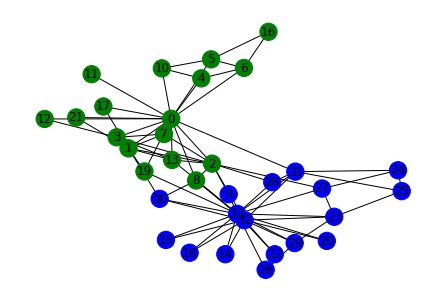

In [431]:
# CENTRALIDAD
centrality = nx.eigenvector_centrality(A_nx)

cen_vec = np.fromiter(centrality.values(), dtype=float)

# sum = 0
# for i in range (len(cen_vec)):
#     sum += cen_vec[i]
# for i in range (len(cen_vec)):
#     cen_vec[i] /= sum
# print(cen_vec)

# COLOR
color_map = []
for i in range(len(grupos_vec)):
    if grupos_vec[i] == 1:
        color_map.append('blue')
    else: 
        color_map.append('green')


# GRAFO DE A
nx.draw(A_nx, node_color=color_map, with_labels=True)

sorted((v, f"{c:0.4f}") for v, c in centrality.items())

print(cen_vec)

print(avec_a[:,0])

[(0, '0.3555'),
 (1, '0.2660'),
 (2, '0.3172'),
 (3, '0.2112'),
 (4, '0.0760'),
 (5, '0.0795'),
 (6, '0.0795'),
 (7, '0.1710'),
 (8, '0.2274'),
 (9, '0.1027'),
 (10, '0.0760'),
 (11, '0.0529'),
 (12, '0.0843'),
 (13, '0.2265'),
 (14, '0.1014'),
 (15, '0.1014'),
 (16, '0.0236'),
 (17, '0.0924'),
 (18, '0.1014'),
 (19, '0.1479'),
 (20, '0.1014'),
 (21, '0.0924'),
 (22, '0.1014'),
 (23, '0.1501'),
 (24, '0.0571'),
 (25, '0.0592'),
 (26, '0.0756'),
 (27, '0.1335'),
 (28, '0.1311'),
 (29, '0.1350'),
 (30, '0.1748'),
 (31, '0.1910'),
 (32, '0.3087'),
 (33, '0.3734')]

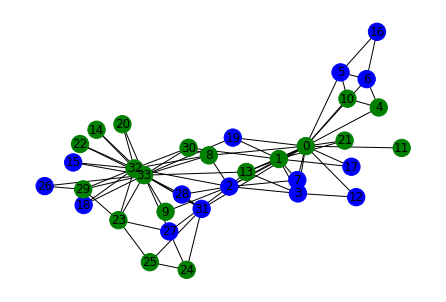

In [433]:
# COLOR
color_map = []
for i in range(len(grupos_vec)):
    if conectividad[i] > 0:
        color_map.append('blue')
    else: 
        color_map.append('green')


# GRAFO DE A
nx.draw(A_nx, node_color=color_map, with_labels=True)

sorted((v, f"{c:0.4f}") for v, c in centrality.items())

In [9]:
# Los autovectores de numpy dan mal

print(np_aval_a[0])
print("")
print (A @ np_avec_a[5])
print("")
print(np_aval_a[0] * np_avec_a[5])

(6.725697727631747+0j)

[ 0.26981342-0.02701661j  0.0785413 +0.00502242j -0.05503426+0.08340887j
  0.28250881+0.j          0.18567084+0.j          0.26076202+0.j
 -0.4002951 +0.j          0.11275947+0.j          0.0010512 +0.03203902j
 -0.03875734+0.j         -0.47538628+0.j          0.07948305+0.j
  0.02047824+0.j          0.12737805+0.j          0.00098554+0.02701661j
  0.00098554+0.02701661j -0.37244443+0.j          0.22514019+0.j
  0.00098554+0.02701661j  0.23975877+0.j          0.00098554+0.02701661j
  0.22514019+0.j          0.00098554+0.02701661j -0.44775385+0.07838646j
 -0.43633096+0.02937566j  0.54983322-0.02701661j -0.01142289-0.00502242j
  0.52470893+0.j         -0.05239038-0.02701661j  0.44938278-0.02937566j
  0.14734323+0.02701661j -0.24661566+0.02701661j  0.73537106-0.02701661j
  0.77599647+0.j        ]

[ 0.53457894+0.j          0.97964594+0.j         -0.35899028+0.j
 -0.39684848+0.j         -0.87551967+0.j         -2.85636371+0.j
  0.35141503+0.j         -0.52592467+0.j

In [10]:
# CORRELACION (ENTRE LAPLACIANA Y VECTOR DE GRUPOS)
# for i in range (34):
#     dot_prod = np.dot(avec_l[:,i], grupos_vec)
#     norm_prod = np.linalg.norm(avec_l[:,i]) * np.linalg.norm(grupos_vec)
#     total = dot_prod / norm_prod
#     print(i)
#     print(total)
#     print("")
    
sum = 0
for i in range (34):
    if (avec_l[32][i] > 0) != (grupos_vec[i]):
        sum += 1
print(sum)

20


## 3. EGO FACEBOOK

[[ True  True False ...  True False  True]
 [ True  True False ...  True False  True]
 [False False  True ... False False False]
 ...
 [ True  True False ...  True False False]
 [False False False ... False  True  True]
 [ True  True False ... False  True  True]]
792
umbral: 
3

cantidad de conexiones: 
176123


TypeError: 'AxesSubplot' object is not subscriptable

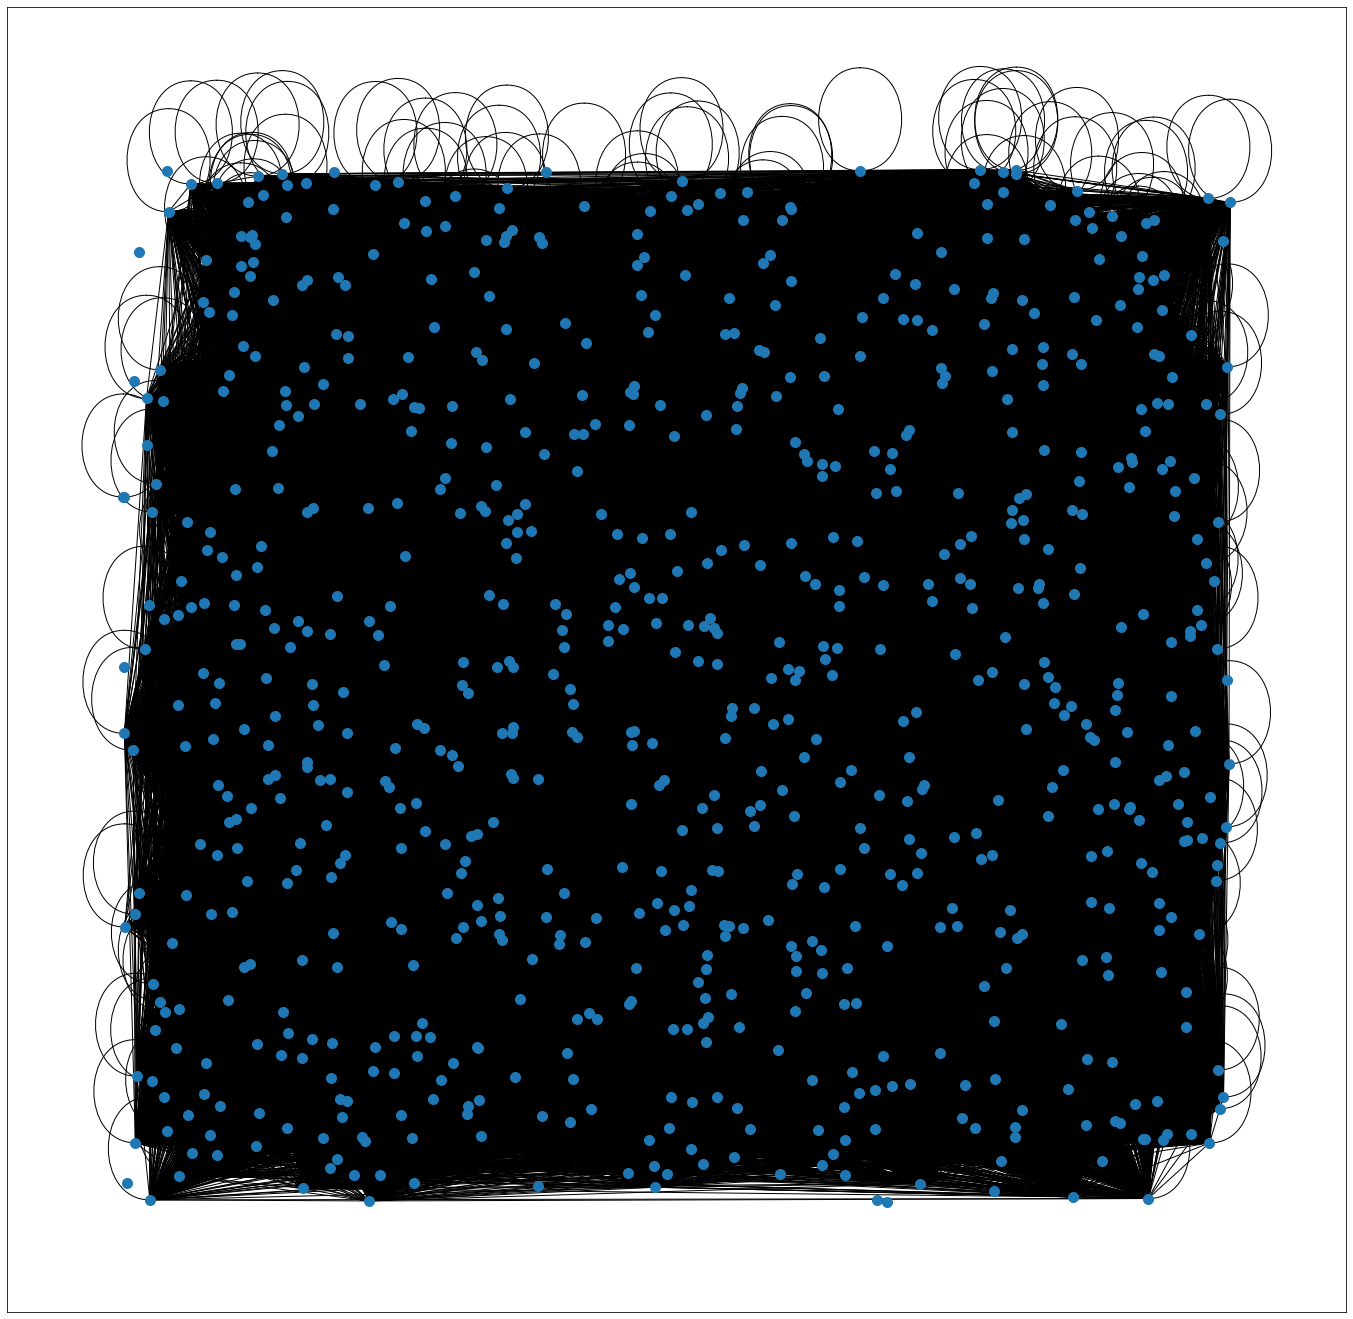

In [168]:
# EJERCICIO 3.1 

# leemos matriz de atributos
input = np.loadtxt(TEST_DIR + "ego-facebook.feat", dtype='i', delimiter=' ')
X = np.delete(input,0,1)

# Transformo matriz en archivo .txt
df = pandas.DataFrame(data=X.astype(float))
df.to_csv("ego-facebook.txt", sep=' ', header=False, float_format='%.2f', index=False)


# Calculo matriz de adyacencia y grafo de la red
n = D.shape[0]
x = np.random.rand(n)
y = np.random.rand(n)
W = np.vstack([x,y]).T
pos = {i:p for i,p in enumerate(zip(x,y))}
k = 5
f, axs = plt.subplots(figsize=(24,24))
min_non_0 = np.min(D[np.nonzero(D)])
ee = np.concatenate(([0], np.linspace(min_non_0, D.max() * 0.8, k)))
u = 3

# Construir matriz de adyacencia
A = D > u
print(A)
print(len(A[1]))
sum = 0
for i in range(len(A)):
    for j in range(len(A)):
        sum += A[i][j]
print("umbral: ")
print(u)
print("")
print("cantidad de conexiones: ") ## AMISTADES ES / 2
print (sum)

 # Construir grafo
G = nx.from_numpy_array(A)
# Plotear red
nx.draw_networkx_nodes(G,pos=pos, node_size=100)
nx.draw_networkx_edges(G,pos=pos)
axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [303]:
# EJERCICIO 3.2 / 3.3


# Matriz de similaridad
D = X @ X.T
A = D >= 4

fb_a = np.loadtxt(TEST_DIR + "ego-facebook.edges", dtype='i', delimiter=' ')
l = len(fb_a)

A_fb = np.zeros(shape=(792, 792))

sum = 0
for i in range(l):
    elem_1 = fb_a[i][0] - 2661
    elem_2 = fb_a[i][1] - 2661
    if (elem_1 >= 0 and elem_2 >= 0 and elem_1 <= 792 and elem_2 <= 792):
        A_fb[elem_1][elem_2] = 1
        A_fb[elem_2][elem_1] = 1

flatten_A_fb = A_fb.flatten()
# flatten_A = A.flatten()

sum = 0
for i in range(len(A_fb)):
    for j in range(len(A_fb)):
        sum += A_fb[i][j]
print("cantidad de conexiones: ")
print(sum)

# COMPARACION ELEMENTO A ELEMENTO
sum_conexiones = 0
sum_no_conexiones = 0
for i in range(flatten_A_fb.size):
    if (flatten_A_fb[i] == 1 and flatten_A[i] == True):
        sum_conexiones += 1
    elif ((flatten_A_fb[i] == 0 and flatten_A[i] == 1) or (flatten_A_fb[i] == 1 and flatten_A[i] == 0)):
        sum_no_conexiones += 1
        
print("cantidad de conexiones iguales: ")
print(sum_conexiones)
print("cantidad de conexiones diferentes: ")
print(sum_no_conexiones)

sum_conexiones/flatten_A_fb.size*100

# correlaciones = []
# u= 1
# for u in range(10):
#     A = D >= u
#     flatten_A = A.flatten()
#     c = np.corrcoef(flatten_A_fb, flatten_A)[0][1]
#     correlaciones.append(c)
    
# correlaciones

D

cantidad de conexiones: 
27652.0
cantidad de conexiones iguales: 
28
cantidad de conexiones diferentes: 
28768


array([[10,  7,  3, ...,  4,  3,  5],
       [ 7,  9,  3, ...,  4,  3,  6],
       [ 3,  3,  7, ...,  3,  3,  3],
       ...,
       [ 4,  4,  3, ...,  6,  2,  3],
       [ 3,  3,  3, ...,  2,  8,  4],
       [ 5,  6,  3, ...,  3,  4,  8]], dtype=int32)

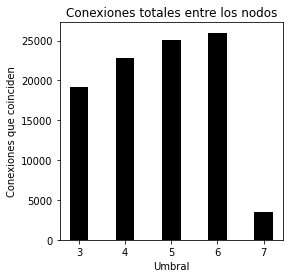

In [88]:
# creating the dataset
data = {'3':19196,'4':22750, '5':25020, '6':25984, '7':3471}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='black', width = 0.4)

plt.xlabel("Umbral")
plt.ylabel("Conexiones que coinciden")
plt.title("Conexiones totales entre los nodos")
plt.show()

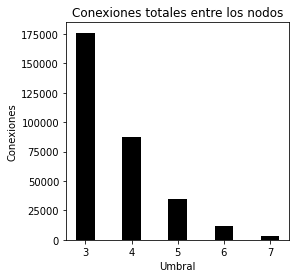

In [72]:
# creating the dataset
data = {'3':176123,'4':87324, '5':34369, '6':11980, '7':3471}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='black',
        width = 0.4)

plt.xlabel("Umbral")
plt.ylabel("Conexiones")
plt.title("Conexiones totales entre los nodos")
plt.show()

In [194]:
# EJ 3.2/3.3
# COMPARACION CORRELACION AUTOVALORES

l_fb, v_fb = np.linalg.eig(A_fb)

# AGREGAR CORRELACION
correlaciones = []
names = []
for u in range(16):
    A = D >= u
    l, v = np.linalg.eig(A)
    c = np.corrcoef(l, l_fb)[0][1]
    correlaciones.append(c)
    names.append(u)
    
correlaciones


[(0.4206311180332429+1.3112042029177606e-22j),
 (0.43732057381712425-4.154855763991779e-18j),
 (0.4957723681197937+3.8480569253800825e-19j),
 (0.46583761485888764-7.329896996554904e-19j),
 (0.49197964627408586+3.0742624479853964e-20j),
 (0.5308755569176499-3.560140548266331e-23j),
 (0.5793753069098982-5.447087062402178e-23j),
 (0.6262527251230009-6.846769115482825e-23j),
 (0.5289645821019074+1.1863307417204877e-19j),
 (0.31353938161638784+2.0685773900446256e-19j),
 (0.3242977145920469-7.599054136759805e-23j),
 0.1606223211764151,
 (0.19835578789418068+1.7156204181881546e-20j),
 0.1502889385197386,
 0.028777853892639312,
 0.0346217463351841]

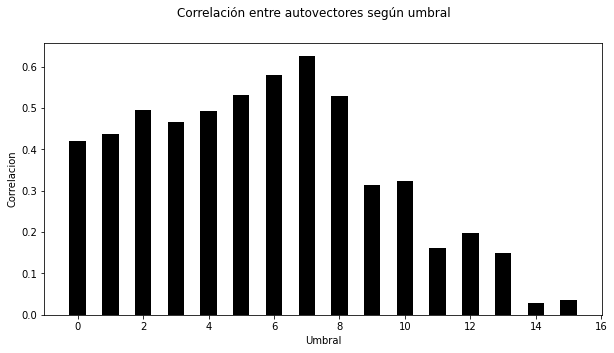

In [198]:
names = names
values = correlaciones

plt.figure(figsize=(10, 5))

plt.plot
plt.bar(names, values, color ='black', width = 0.5)
plt.xlabel("Umbral")
plt.ylabel("Correlacion")
plt.suptitle('Correlación entre autovectores según umbral')
plt.show()

In [248]:
# EJERCICIO 3.4
# Matriz de covarianza
M_x = (X.T @ X)/318

# Guardo matriz de covarianza en archivo .txt 
df = pandas.DataFrame(data=M_x.astype(float))
df.to_csv(TEST_DIR + "covariance-matrix-fb.txt", sep = ' ', header=False, float_format='%.6f', index=False)

# Obtengo autovalores y autovectores de la matriz de covarianza
# run_test("covariance-matrix-fb.txt", 10000, 0.00001)

# Calculamos autovalores de la matriz de facebook 
l = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovalores.out", dtype='f', delimiter=' ')

# Calculamos V (autovectores de M_x)
V = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovectores.out", delimiter=' ', usecols=range(319))

# Calculamos D
D = np.diag(l)

# l, l2
res = V @ D @ V.T

l, V

print(M_x)
print('')
print(res)
print(l)
#X_2 = V @ X.T
# M_x2 = (X_2.T @ X_2)/318

[[0.00628931 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01257862 0.         ... 0.         0.         0.        ]
 [0.         0.         0.0408805  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.06603774 0.         0.        ]
 [0.         0.         0.         ... 0.         0.03459119 0.        ]
 [0.         0.         0.         ... 0.         0.         0.03773585]]

[[ 6.28911719e-03 -2.97004797e-09 -4.48859963e-09 ... -7.38863292e-10
   2.73200630e-09 -2.12892440e-09]
 [-2.97004797e-09  1.25792291e-02 -1.00213852e-08 ... -1.36153644e-08
  -4.84129486e-09 -8.40250107e-10]
 [-4.48859963e-09 -1.00213852e-08  4.08817071e-02 ... -9.09833028e-09
  -1.61273673e-08 -4.16317512e-09]
 ...
 [-7.38863292e-10 -1.36153644e-08 -9.09833028e-09 ...  6.60389908e-02
  -4.05063191e-08 -3.67057321e-08]
 [ 2.73200630e-09 -4.84129486e-09 -1.61273673e-08 ... -4.05063191e-08
   3.45915935e-02 -3.20909843e-08]
 [-2.12892440e-09 -8.4025

In [262]:
a = np.sum(l)

variance_explained = []
for i in l:
    variance_explained.append((i/np.sum(l))*100)
        
print(variance_explained)


[37.05548644065857, 5.653638020157814, 4.434089735150337, 3.909965604543686, 2.8448864817619324, 2.064131572842598, 1.65774617344141, 1.6094285994768143, 1.4193832874298096, 1.3969088904559612, 1.236799731850624, 1.2472954578697681, 1.128472201526165, 1.0645102709531784, 1.025069784373045, 0.9177977219223976, 0.8147227577865124, 0.803014449775219, 0.7102782838046551, 0.7124904543161392, 0.6670843344181776, 0.6396324373781681, 0.6231716368347406, 0.5730117671191692, 0.5827692337334156, 0.5518964491784573, 0.533840712159872, 0.5244223866611719, 0.5040644202381372, 0.48174154944717884, 0.4621753469109535, 0.44348021037876606, 0.4354995209723711, 0.40819193236529827, 0.3821552498266101, 0.37873671390116215, 0.3625012934207916, 0.3499559359624982, 0.34032328985631466, 0.33631501719355583, 0.32496419735252857, 0.31511038541793823, 0.29871584847569466, 0.2931941766291857, 0.2910981886088848, 0.27654855512082577, 0.27420197147876024, 0.26597895193845034, 0.2579118590801954, 0.2511301077902317,

In [265]:
# Identifying components that explain at least 95%

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 37.05548644  42.70912446  47.1432142   51.0531798   53.89806628
  55.96219786  57.61994403  59.22937263  60.64875592  62.04566481
  63.28246454  64.52976     65.6582322   66.72274247  67.74781225
  68.66560997  69.48033273  70.28334718  70.99362547  71.70611592
  72.37320025  73.01283269  73.63600433  74.2090161   74.79178533
  75.34368178  75.87752249  76.40194488  76.9060093   77.38775085
  77.84992619  78.2934064   78.72890593  79.13709786  79.51925311
  79.89798982  80.26049112  80.61044705  80.95077034  81.28708536
  81.61204956  81.92715994  82.22587579  82.51906997  82.81016815
  83.08671671  83.36091868  83.62689763  83.88480949  84.1359396
  84.38183391  84.61948826  84.85251283  85.07920429  85.30680595
  85.52492515  85.73725394  85.95090683  86.15573375  86.35799338
  86.55608019  86.74326297  86.92990536  87.11602292  87.29911207
  87.47899835  87.64913389  87.82185487  87.98685606  88.14866161
  88.30903855  88.46716483  88.62240174  88.77649843  88.92810412
  89.078863

319


Text(0.5, 1.0, 'Varianza explicada vs número de componentes')

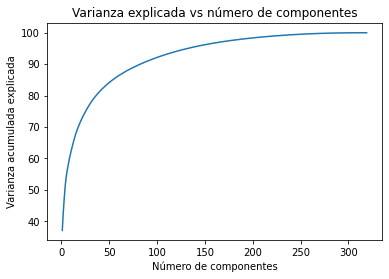

In [335]:
import seaborn as sns
print(len(cumulative_variance_explained))

x = np.array(list(range(1,320)))
y = list(cumulative_variance_explained)

sns.lineplot(x=x, y=y)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada explicada")
plt.title("Varianza explicada vs número de componentes")

In [410]:
projection_matrix = (V[:][:300]).T
X_pca = X.dot(projection_matrix)
D = X_pca @ X_pca.T

In [411]:
correlaciones = []
names = []
for u in range(16):
    A = D >= u
    l, v = np.linalg.eig(A)
    c = np.corrcoef(l, l_fb)[0][1]
    correlaciones.append(abs(c))
    names.append(u)
    
correlaciones

[0.4334536235100523,
 0.4558902573051942,
 0.4426417036685268,
 0.4755546066800215,
 0.5852430446313928,
 0.5550879391682996,
 0.5853417688447146,
 0.492343243874344,
 0.27167994041814075,
 0.3132567859017883,
 0.17268285440174866,
 0.156328734038229,
 0.14977776551301483,
 0.03377522221869789,
 0.030406840778421443,
 0.024989694388935065]

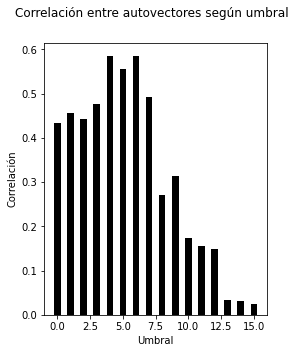

In [412]:
names = names
values = correlaciones

plt.figure(figsize=(4, 5))

plt.plot
plt.bar(names, values, color ='black', width = 0.5)
plt.xlabel("Umbral")
plt.ylabel("Correlación")
plt.suptitle('Correlación entre autovectores según umbral')
plt.show()